# Question 1
load data is_sleepy.csv to a dataframe

(a) what is the entropy of 'meal' 

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('is_sleepy.csv')
df.head()

,Unnamed: 0,meal,tired,exercise,sleepy
0,0,0,1,1,0
1,1,1,1,0,0
2,2,0,0,1,0
3,3,0,1,1,0
4,4,0,1,1,0


(b) what is the entropy of 'tired'

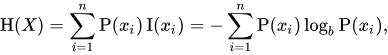

In [3]:
from scipy.stats import entropy

def find_entropy(a):
    return entropy(a.value_counts()/len(a), base=2)

probs_meal = df.meal.value_counts()/len(df)
probs_tired = df.tired.value_counts()/len(df)

print('Entropy of meal: {0:.10f}'.format(find_entropy(df.meal)))
print('Entropy of tired: {0:.10f}'.format(find_entropy(df.tired)))

Entropy of meal: 0.9426831893
Entropy of tired: 0.9043814577


(c) what is the conditional entropy of 'meal' given 'tired'

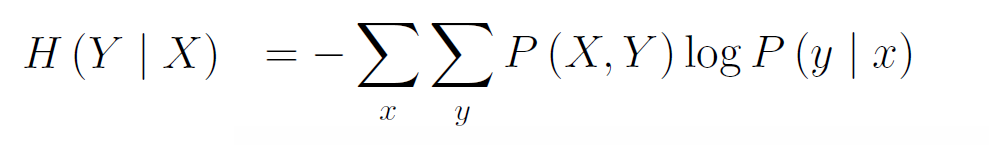

In [4]:
def cond_ent(a,b):
    # A given B
    proba_b = b.value_counts()/len(df)
    cond_ent = find_entropy(a[b==1])*proba_b[1] + find_entropy(a[b==0])*proba_b[0]
    return cond_ent

In [5]:
print("Conditional probability of 'meal' given 'tired':{:.3f}".format(cond_ent(df.meal, df.tired)))

Conditional probability of 'meal' given 'tired':0.841


(d) look at the definition of mutual information from the lecture and answer

$$ I(X;Y) \overset{?}{=} I(Y;X) $$

Given the definition for mutual information:

$I(X;Y) = \sum_{y \in Y} \sum_{x \in X}
  p(x,y) \log{ \left(\frac{p(x,y)}{p(x)\,p(y)}
  \right) }$,

it follows from rearrangement of the summands:

$I(Y; X) =
  \sum_{x \in X} \sum_{y \in Y}
  p(x,y) \log{ \left(\frac{p(x,y)}{p(x)\,p(y)}
  \right) }$
  
Hence I(X;Y)=I(Y;X).

(e) compute 
$$ I(X;Y)=H(X)-H(X\mid Y) $$
and 
$$ I(Y;X)=H(Y)-H(Y\mid X) $$
for X=meal and Y=tired
are they equal? do they satisfy 
$$ \left\|I(Y;X)-I(X;Y)\right\|<1\cdot 10^{-15} $$

In [45]:
I_XY = find_entropy(df.tired) - cond_ent(df.tired, df.meal)
I_YX = find_entropy(df.meal) - cond_ent(df.meal, df.tired)
print('Mutual informations I(X,Y) : %f' %I_XY)
print('Mutual informations I(Y,X) : %f' %I_YX)

Mutual informations I(X,Y) : 0.070714
Mutual informations I(Y,X) : 0.070714


In [46]:
np.linalg.norm(I_YX-I_XY) < 10**(-15) 

True

# Question 2
use the same data from question 1. our target is to predict sleepy column using the other columns

(a) what is the optimal question for the data $ qa $ using the information gain criterion?

Best question results in biggest drop in entropy. So we need to maximise the information criterion
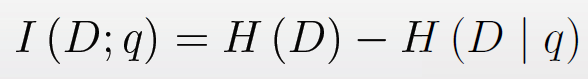

In [47]:
info_gain_tired = find_entropy(df.sleepy) - cond_ent(df.sleepy, df.tired)
info_gain_meal = find_entropy(df.sleepy) - cond_ent(df.sleepy, df.meal)
info_gain_exercise = find_entropy(df.sleepy) - cond_ent(df.sleepy, df.exercise)

print('Information gathered from asking whether tired: {:.2%}'.format(info_gain_tired))
print('Information gathered from asking whether eaten: {:.2%}'.format(info_gain_meal))
print('Information gathered from asking whether exercised: {:.2%}'.format(info_gain_exercise))

Information gathered from asking whether tired: 10.75%
Information gathered from asking whether eaten: 2.36%
Information gathered from asking whether exercised: 0.12%


Therefore, most information gained from asking whether tired. Seems intuitive!

(b) we segment the data as following

\begin{array}{|c|c|c|}
\hline
\boldsymbol{math} & \boldsymbol{python} & \textbf{in words} \\
\hline
\hline
\hline
D_{1y} & D.qa==1 & qa\text{ is yes}\\
\hline
D_{1n} & D.qa==0 & qa\text{ is no}\\
\hline
\end{array}


you can now ask another question $ qb $
you can ask it regarding $ D_{1y} $ or $ D_{1n} $

What is the best question for $ D_{1y} $? What is the best question for $ D_{1n} $?

In [59]:
#So, which is the next best question to ask, given their answer to 'are you tired'?

#If answered 'yes'
info_gain_meal = find_entropy(df[df.tired==1].sleepy) - cond_ent(df[df.tired==1].sleepy, df[df.tired==1].meal)
info_gain_exercise = find_entropy(df[df.tired==1].sleepy) - cond_ent(df[df.tired==1].sleepy, df[df.tired==1].exercise)
print("If answered 'yes' to tired, info gain from asking if eaten: {:.2%}".format(info_gain_meal))
print("If answered 'yes' to tired, info gain from asking if exercised: {:.2%}".format(info_gain_exercise))

#If answered 'no'
info_gain_meal = find_entropy(df[df.tired==0].sleepy) - cond_ent(df[df.tired==0].sleepy, df[df.tired==0].meal)
info_gain_exercise = find_entropy(df[df.tired==0].sleepy) - cond_ent(df[df.tired==0].sleepy, df[df.tired==0].exercise)
print("If answered 'no' to tired, info gain from asking if eaten: {:.2%}".format(info_gain_meal))
print("If answered 'no' to tired, info gain from asking if exercised: {:.2%}".format(info_gain_exercise))

If answered 'yes' to tired, info gain from asking if eaten: 11.60%
If answered 'yes' to tired, info gain from asking if exercised: 14.14%
If answered 'no' to tired, info gain from asking if eaten: 46.75%
If answered 'no' to tired, info gain from asking if exercised: 48.95%


In both cases, asking whether they exercised yields the greatest information gain.

**Bonus**

(c) if you can only ask the question $ q2 $ for either $ D_{1y} $ or $ D_{1n} $, which one should you choose?

D1N, as this yields the greater information gain